#### Israel Palestine Conflict Analysis

**Import dependencies**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Data Collection**

In [51]:
# Loading the dataset into a pandas dataframe
conflict_df = pd.read_csv("fatalities.csv")

In [52]:
# Printing the dataset
conflict_df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [53]:
# Getting the shape of the dataset
conflict_df.shape

(11124, 16)

In [54]:
# Getting some basic information about the dataset
conflict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

**Important Information**

In [55]:
citizenship_counts = conflict_df["citizenship"].value_counts()
event_location_region = conflict_df["event_location_region"].value_counts()
hostility_counts = conflict_df[conflict_df["took_part_in_the_hostilities"] == "Yes"].value_counts()
no_hostility_counts = conflict_df[conflict_df["took_part_in_the_hostilities"] == "No"].value_counts()

**Types of fires**

<Axes: >

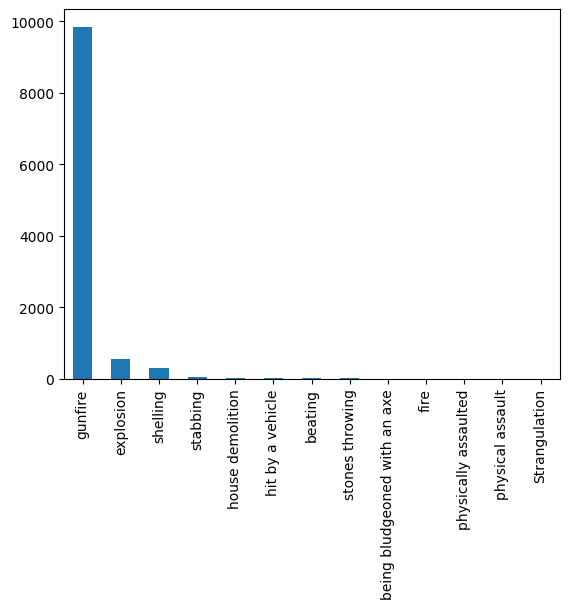

In [56]:
conflict_df["type_of_injury"].value_counts().plot(kind="bar")

**Group data by gender and visualize**

In [57]:
hostility_by_gender = conflict_df.groupby("gender")["took_part_in_the_hostilities"].value_counts().reset_index(name="count")
# Visualizing using a grouped bar chart
fig = px.bar(hostility_by_gender, x="took_part_in_the_hostilities", y="count", color="gender", barmode="group", labels={"count": "Gender", "took_part_in_the_hostilities": "Hostility"}, title="Hostility counts by gender")
# Adjust title position
fig.update_layout(title={"x": 0.5, "xanchor": "center"})

**Calculate summary statistics for age**

In [58]:
conflict_df["age"].describe()

count    10995.000000
mean        26.745703
std         13.780548
min          1.000000
25%         19.000000
50%         23.000000
75%         31.000000
max        112.000000
Name: age, dtype: float64

**Group data by "event_location_region" and count incidents**

In [59]:
conflict_df["event_location_region"].value_counts().reset_index()

,index,event_location_region
0,Gaza Strip,7733
1,West Bank,2712
2,Israel,679


In [60]:
elr = conflict_df["event_location_region"].value_counts().reset_index()
elr.columns = ['region', 'count']  # Rename columns for clarity
# Visualizing using a pie chart with correct columns
px.pie(elr, values='count', names='region', title='Event location region')

**Count unique values of "place_of_residence" within each region**

<Axes: ylabel='place_of_residence'>

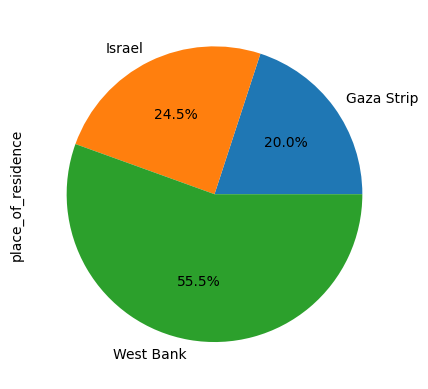

In [61]:
conflict_df.groupby("event_location_region")["place_of_residence"].nunique().plot(kind="pie", autopct="%1.1f%%")

**Calculate average age by "event_location_region"**

In [62]:
conflict_df.groupby("event_location_region")["age"].mean()

event_location_region
Gaza Strip    26.020224
Israel        36.286776
West Bank     26.421746
Name: age, dtype: float64

**Getting the incidents in a specific region by citizenship**

In [63]:
incident_by_citizenship = conflict_df.groupby("citizenship").size().reset_index()
incident_by_citizenship.columns = ["citizenship", "incident count"]
incident_by_citizenship

,citizenship,incident count
0,American,1
1,Israeli,1029
2,Jordanian,2
3,Palestinian,10092


In [64]:
# Visualizing using a donut chart
px.pie(incident_by_citizenship, values="incident count", names="citizenship", hole=0.4)

**Getting the kill count by gender**

In [65]:
kill_count = conflict_df.groupby("gender")["killed_by"].value_counts().reset_index(name="count")
gender_inc = kill_count["gender"] + "-" + kill_count["killed_by"]
gender_inc
# Visualizing using a sliced pie chart
fig = px.pie(kill_count, values="count", names=gender_inc, color="killed_by")
fig.update_traces(pull=[0.2, 0, 0, 0.1, 0.3, 0.1])
fig.show()

**Getting the average number of males and females from a specific region involved in specific injuries**

In [77]:
conflict_df[(conflict_df["event_location_region"] == "West Bank" ) & (conflict_df["type_of_injury"] == "gunfire")].groupby("gender")["age"].mean()

gender
F    30.727273
M    25.547005
Name: age, dtype: float64

**Time-based analysis(Grouping by year and month)**

In [89]:
conflict_df["date_of_event"] = pd.to_datetime(conflict_df["date_of_event"])
# Getting the year
conflict_df["year"] = conflict_df["date_of_event"].dt.year
# Getting the month
conflict_df["month"] = conflict_df["date_of_event"].dt.month_name()
# Grouping by year and month
time_event = conflict_df.groupby(["year", "month"]).size().reset_index(name="incident count")
time_event["year-month"] = time_event["month"] + "-" + time_event["year"].astype(str)
time_event

,year,month,incident count,year-month
0,2000,December,10,December-2000
1,2000,November,17,November-2000
2,2000,October,8,October-2000
3,2001,April,4,April-2001
4,2001,August,26,August-2001
...,...,...,...,...
262,2023,July,25,July-2023
263,2023,June,24,June-2023
264,2023,March,25,March-2023
265,2023,May,53,May-2023


**Using pivot tables**

In [94]:
# Calculate the average number of female citizens
female_age = pd.pivot_table(data=conflict_df[conflict_df["gender"] == "F"], values="age", index=["citizenship"], aggfunc="mean")
female_age

,age
citizenship,
Israeli,37.670769
Jordanian,26.000000
Palestinian,27.908240
